In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import urllib.parse
import numpy as np
import pickle

# List of bad words to check in the URL path
badwords = ['sleep', 'uid', 'select', 'waitfor', 'delay', 'system', 'union', 'order by', 'group by', 'admin', 'drop', 'script']

def ExtractFeatures(path, body):
    path = str(path)
    body = str(body)
    combined_raw = path + body
    raw_percentages = combined_raw.count("%")
    raw_spaces = combined_raw.count(" ")

    raw_percentages_count = raw_percentages if raw_percentages > 3 else 0
    raw_spaces_count = raw_spaces if raw_spaces > 3 else 0

    path_decoded = urllib.parse.unquote_plus(path)
    body_decoded = urllib.parse.unquote_plus(body)

    single_q = path_decoded.count("'") + body_decoded.count("'")
    double_q = path_decoded.count("\"") + body_decoded.count("\"")
    dashes = path_decoded.count("--") + body_decoded.count("--")
    braces = path_decoded.count("(") + body_decoded.count("(")
    spaces = path_decoded.count(" ") + body_decoded.count(" ")
    semicolons = path_decoded.count(";") + body_decoded.count(";")
    angle_brackets = path_decoded.count("<") + path_decoded.count(">") + body_decoded.count("<") + body_decoded.count(">")
    special_chars = sum(path_decoded.count(c) + body_decoded.count(c) for c in '$&|')

    badwords_count = sum(path_decoded.lower().count(word) + body_decoded.lower().count(word) for word in badwords)

    path_length = len(path_decoded)
    body_length = len(body_decoded)

    return [single_q, double_q, dashes, braces, spaces, raw_percentages_count, semicolons, angle_brackets, special_chars, path_length, body_length, badwords_count]


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import urllib.parse
import pickle

# Load dataset
http = pd.read_csv(r'C:\Users\Rudra kumar\Desktop\`\project\Python proj\New folder (2)\all_datas_f.csv')
missing_values = http.isna().sum()
print(missing_values)

# Check if the necessary columns exist
required_columns = ['path', 'body', 'class']
missing_columns = [col for col in required_columns if col not in http.columns]

if missing_columns:
    raise ValueError(f"Error: The dataset is missing the following columns: {', '.join(missing_columns)}")



badwords = ['sleep', 'uid', 'select', 'waitfor', 'delay', 'system', 'union', 'order by', 'group by', 'admin', 'drop', 'script']


http['features'] = http.apply(lambda row: ExtractFeatures(row['path'], row['body']), axis=1)

X = np.array(http['features'].tolist())
y = http['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))


y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


method              0
path                0
body              418
single_q            0
double_q            0
dashes              0
braces              0
spaces              0
percentages         0
semicolons          0
angle_brackets      0
special_chars       0
path_length         0
body_length         0
badwords_count      0
class               0
dtype: int64
Accuracy: 0.9238095238095239
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        48
           1       1.00      0.86      0.92        57

    accuracy                           0.92       105
   macro avg       0.93      0.93      0.92       105
weighted avg       0.93      0.92      0.92       105



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
http['prediction'] = model.predict(X)

   
#http.to_csv(r'C:\Users\Rudra kumar\Desktop\Python proj\predicted_data2.csv', index=False)
print("Predicted data saved to predicted_data.csv")

In [4]:
testing_data = pd.read_csv(r'C:\Users\Rudra kumar\Desktop\`\project\Python proj\New folder (2)\new_data.csv')
if 'path' in testing_data.columns and 'body' in testing_data.columns:
        # Extract features from the testing data paths and bodies
    test_features = testing_data.apply(lambda row: ExtractFeatures(row['path'], row['body']), axis=1).tolist()

        # Convert test_features to a 2D numpy array
    test_features = np.array(test_features)

        # Predict whether each data point is good or bad
    predictions = model.predict(test_features)

        # Add the predictions to the testing data DataFrame
    testing_data['Prediction'] = predictions

        # Save the testing data with predictions to a new CSV file
    #testing_data.to_csv(r'C:\Users\Rudra kumar\Desktop\Python proj\testing_datas_with_predictions2.csv', index=False)
    print("Predictions saved to testing_datas_with_predictions.csv")
else:
    print("Error: The testing data must contain 'path' and 'body' columns.")


Predictions saved to testing_datas_with_predictions.csv


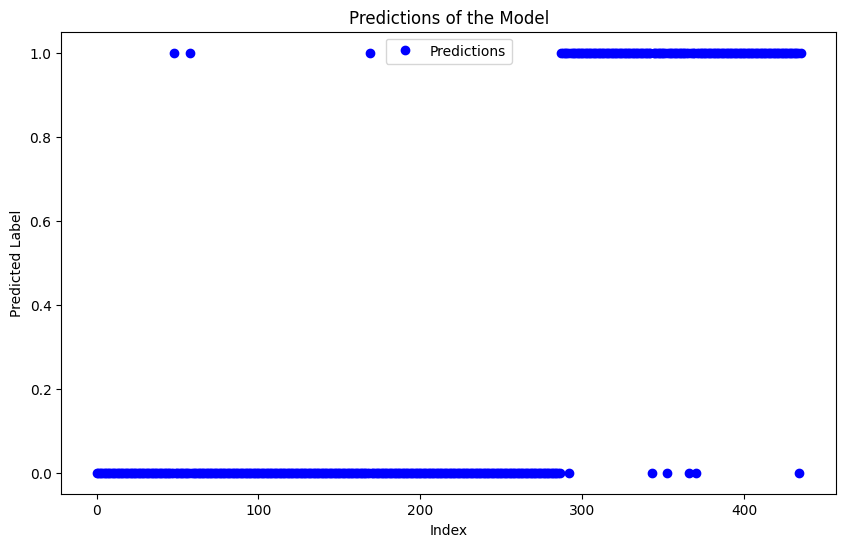

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(testing_data.index, predictions, marker='o', linestyle='', color='b', label='Predictions')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Predicted Label')
plt.title('Predictions of the Model')

# Show legend
plt.legend()

# Show plot
plt.show()

In [ ]:
from http.server import SimpleHTTPRequestHandler, HTTPServer 
from urllib import request, error
import numpy as np
import pickle
import urllib.parse

badwords = ['sleep', 'uid', 'select', 'waitfor', 'delay', 'system', 'union', 'order by', 'group by', 'admin', 'drop', 'script']

def ExtractFeatures(path, body):
    path = str(path)
    body = str(body)
    combined_raw = path + body
    raw_percentages = combined_raw.count("%")
    raw_spaces = combined_raw.count(" ")

    # Check if both counts exceed the threshold
    raw_percentages_count = raw_percentages if raw_percentages > 3 else 0
    raw_spaces_count = raw_spaces if raw_spaces > 3 else 0

    # Decode the path and body for other feature extractions
    path_decoded = urllib.parse.unquote_plus(path)
    body_decoded = urllib.parse.unquote_plus(body)

    single_q = path_decoded.count("'") + body_decoded.count("'")
    double_q = path_decoded.count("\"") + body_decoded.count("\"")
    dashes = path_decoded.count("--") + body_decoded.count("--")
    braces = path_decoded.count("(") + body_decoded.count("(")
    spaces = path_decoded.count(" ") + body_decoded.count(" ")
    semicolons = path_decoded.count(";") + body_decoded.count(";")
    angle_brackets = path_decoded.count("<") + path_decoded.count(">") + body_decoded.count("<") + body_decoded.count(">")
    special_chars = sum(path_decoded.count(c) + body_decoded.count(c) for c in '$&|')

    badwords_count = sum(path_decoded.lower().count(word) + body_decoded.lower().count(word) for word in badwords)

    path_length = len(path_decoded)
    body_length = len(body_decoded)

    return [single_q, double_q, dashes, braces, spaces, raw_percentages_count, semicolons, angle_brackets, special_chars, path_length, body_length, badwords_count]

# Define the SimpleHTTPProxy class
class SimpleHTTPProxy(SimpleHTTPRequestHandler):
    proxy_routes = {}

    @classmethod
    def set_routes(cls, proxy_routes):
        cls.proxy_routes = proxy_routes

    def do_GET(self):
        parts = self.path.split('/')
        print(parts)
        if len(parts) > 3:
            path_part = parts[3]
            body = ""  
            live_data = ExtractFeatures(path_part, body)
            live_data = np.array(live_data).reshape(1, -1)  
            
            with open('finalized_model.pkl', 'rb') as file:
                model = pickle.load(file)

            result = model.predict(live_data) 
            print(result[0])
            if result[0] == 1:
                print('Intrusion Detected!!')
                print('It is a bad request')
        
        if len(parts) >= 2:
            self.proxy_request('http://' + parts[2] + '/')
        else:
            super().do_GET()

    def proxy_request(self, url):
        try:
            response = request.urlopen(url)
        except error.HTTPError as e:
            print('err')
            self.send_response_only(e.code)
            self.end_headers()
            return
        self.send_response_only(response.status)
        for name, value in response.headers.items():
            self.send_header(name, value)
        self.end_headers()
        self.copyfile(response, self.wfile)

# Set up and start the server
SimpleHTTPProxy.set_routes({'proxy_route': 'http://demo.testfire.net/'})
with HTTPServer(('127.0.0.1', 8080), SimpleHTTPProxy) as httpd:  # Correct reference to HTTPServer
    host, port = httpd.socket.getsockname()
    print(f'Listening on http://{host}:{port}')
    try:
        httpd.serve_forever()  
    except KeyboardInterrupt:  
        print("\nKeyboard interrupt received, exiting.")


Listening on http://127.0.0.1:8080
['', '']


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 62347)
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 671, in __init__
    super().__init__(*args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 755, in __init__
    self.handle()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 436, in handle
    self.handle_one_request()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 424, in handle_one_request
    method()
  File "C:\Users\Rud

['', '']


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 62349)
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 671, in __init__
    super().__init__(*args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 755, in __init__
    self.handle()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 436, in handle
    self.handle_one_request()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 424, in handle_one_request
    method()
  File "C:\Users\Rud

['http:', '', 'detectportal.firefox.com', 'success.txt?ipv4']
0
['http:', '', 'detectportal.firefox.com', 'success.txt?ipv6']
0


127.0.0.1 - - [31/Jul/2024 10:24:37] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:24:37] "CONNECT img-getpocket.cdn.mozilla.net:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:24:37] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:24:37] "CONNECT img-getpocket.cdn.mozilla.net:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:24:37] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:24:37] "CONNECT img-getpocket.cdn.mozilla.net:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:24:37] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:24:37] "CONNECT img-getpocket.cdn.mozilla.net:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:24:40] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:24:40] "CONNECT img-getpocket.cdn.mozilla.net:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:24:40] code 501, message Unsupported method ('CONNECT')
127.

['', '']


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 62553)
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 671, in __init__
    super().__init__(*args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 755, in __init__
    self.handle()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 436, in handle
    self.handle_one_request()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 424, in handle_one_request
    method()
  File "C:\Users\Rud

['', '']


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 62555)
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 671, in __init__
    super().__init__(*args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 755, in __init__
    self.handle()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 436, in handle
    self.handle_one_request()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 424, in handle_one_request
    method()
  File "C:\Users\Rud

['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 62565)
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 671, in __init__
    super().__init__(*args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 755, in __init__
    self.handle()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 436, in handle
    self.handle_one_request()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 424, in handle_one_request
    method()
  File "C:\Users\Rud

['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 62581)
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 671, in __init__
    super().__init__(*args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 755, in __init__
    self.handle()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 436, in handle
    self.handle_one_request()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 424, in handle_one_request
    method()
  File "C:\Users\Rud

['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 62591)
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 671, in __init__
    super().__init__(*args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 755, in __init__
    self.handle()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 436, in handle
    self.handle_one_request()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 424, in handle_one_request
    method()
  File "C:\Users\Rud

['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 62601)
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 671, in __init__
    super().__init__(*args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 755, in __init__
    self.handle()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 436, in handle
    self.handle_one_request()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 424, in handle_one_request
    method()
  File "C:\Users\Rud

['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']
['', '']


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 62611)
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 671, in __init__
    super().__init__(*args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\socketserver.py", line 755, in __init__
    self.handle()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 436, in handle
    self.handle_one_request()
  File "C:\ProgramData\anaconda3\Lib\http\server.py", line 424, in handle_one_request
    method()
  File "C:\Users\Rud

['http:', '', 'demo.testfire.net', '']
0


127.0.0.1 - - [31/Jul/2024 10:27:10] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:27:10] "CONNECT img-getpocket.cdn.mozilla.net:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:27:10] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:27:10] "CONNECT img-getpocket.cdn.mozilla.net:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:27:11] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:27:11] "CONNECT img-getpocket.cdn.mozilla.net:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:27:11] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:27:11] "CONNECT img-getpocket.cdn.mozilla.net:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:27:11] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:27:11] "CONNECT push.services.mozilla.com:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:27:16] code 501, message Unsupported method ('CONNECT')
127.0.0.

['http:', '', 'demo.testfire.net', 'index.jsp?content=personal_cards.htm']
0
['http:', '', 'demo.testfire.net', 'index.jsp?content=business_lending.htm']
0
['http:', '', 'demo.testfire.net', 'search.jsp?query=hello']
0


127.0.0.1 - - [31/Jul/2024 10:28:16] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:28:16] "CONNECT incoming.telemetry.mozilla.org:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:28:16] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:28:16] "CONNECT incoming.telemetry.mozilla.org:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:28:16] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:28:16] "CONNECT incoming.telemetry.mozilla.org:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:28:21] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:28:21] "CONNECT aus5.mozilla.org:443 HTTP/1.1" 501 -


['http:', '', 'demo.testfire.net', 'index.jsp?content=business.htm']
0
['http:', '', 'demo.testfire.net', 'index.jsp?content=personal_loans.htm']
0
['http:', '', 'demo.testfire.net', 'index.jsp?content=business_retirement.htm']
0
['http:', '', 'demo.testfire.net', 'survey_questions.jsp']
0
['http:', '', 'demo.testfire.net', 'index.jsp?content=inside.htm']
0


127.0.0.1 - - [31/Jul/2024 10:29:40] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:29:40] "CONNECT contile.services.mozilla.com:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:29:40] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:29:40] "CONNECT firefox-api-proxy.cdn.mozilla.net:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:29:52] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:29:52] "CONNECT push.services.mozilla.com:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:34:24] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:34:24] "CONNECT firefox.settings.services.mozilla.com:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:34:40] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:34:40] "CONNECT firefox-api-proxy.cdn.mozilla.net:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:35:12] code 501, message Unsupported method ('CON

['http:', '', 'demo.testfire.net', 'index.jsp?content=personal_deposit.htm']
0
['http:', '', 'demo.testfire.net', 'search.jsp?query=hello']
0


127.0.0.1 - - [31/Jul/2024 10:47:11] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:47:11] "CONNECT incoming.telemetry.mozilla.org:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:47:11] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:47:11] "CONNECT incoming.telemetry.mozilla.org:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:47:11] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:47:11] "CONNECT incoming.telemetry.mozilla.org:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:50:48] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:50:48] "CONNECT firefox-api-proxy.cdn.mozilla.net:443 HTTP/1.1" 501 -
127.0.0.1 - - [31/Jul/2024 10:54:32] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [31/Jul/2024 10:54:32] "CONNECT safebrowsing.googleapis.com:443 HTTP/1.1" 501 -
